In [65]:
from PIL import Image
import numpy as np

In [3]:
img = Image.open("image.png")

original image size 1536 x 1024


In [32]:
def resize_image(image, scale_factor):
    width, height = img.size
    print(f"original image size {width} x {height}")
#     new_width = width
#     new_height = height
    if scale_factor < 0:
        scale_factor *= -1
        new_width = int(width / scale_factor)
        new_height = int(height / scale_factor)
    else:
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)
    print(f"New image size {new_width} x {new_height}")
    return image.resize((new_width, new_height), resample=Image.LANCZOS)

original image size 1536 x 1024
New image size 3072 x 2048


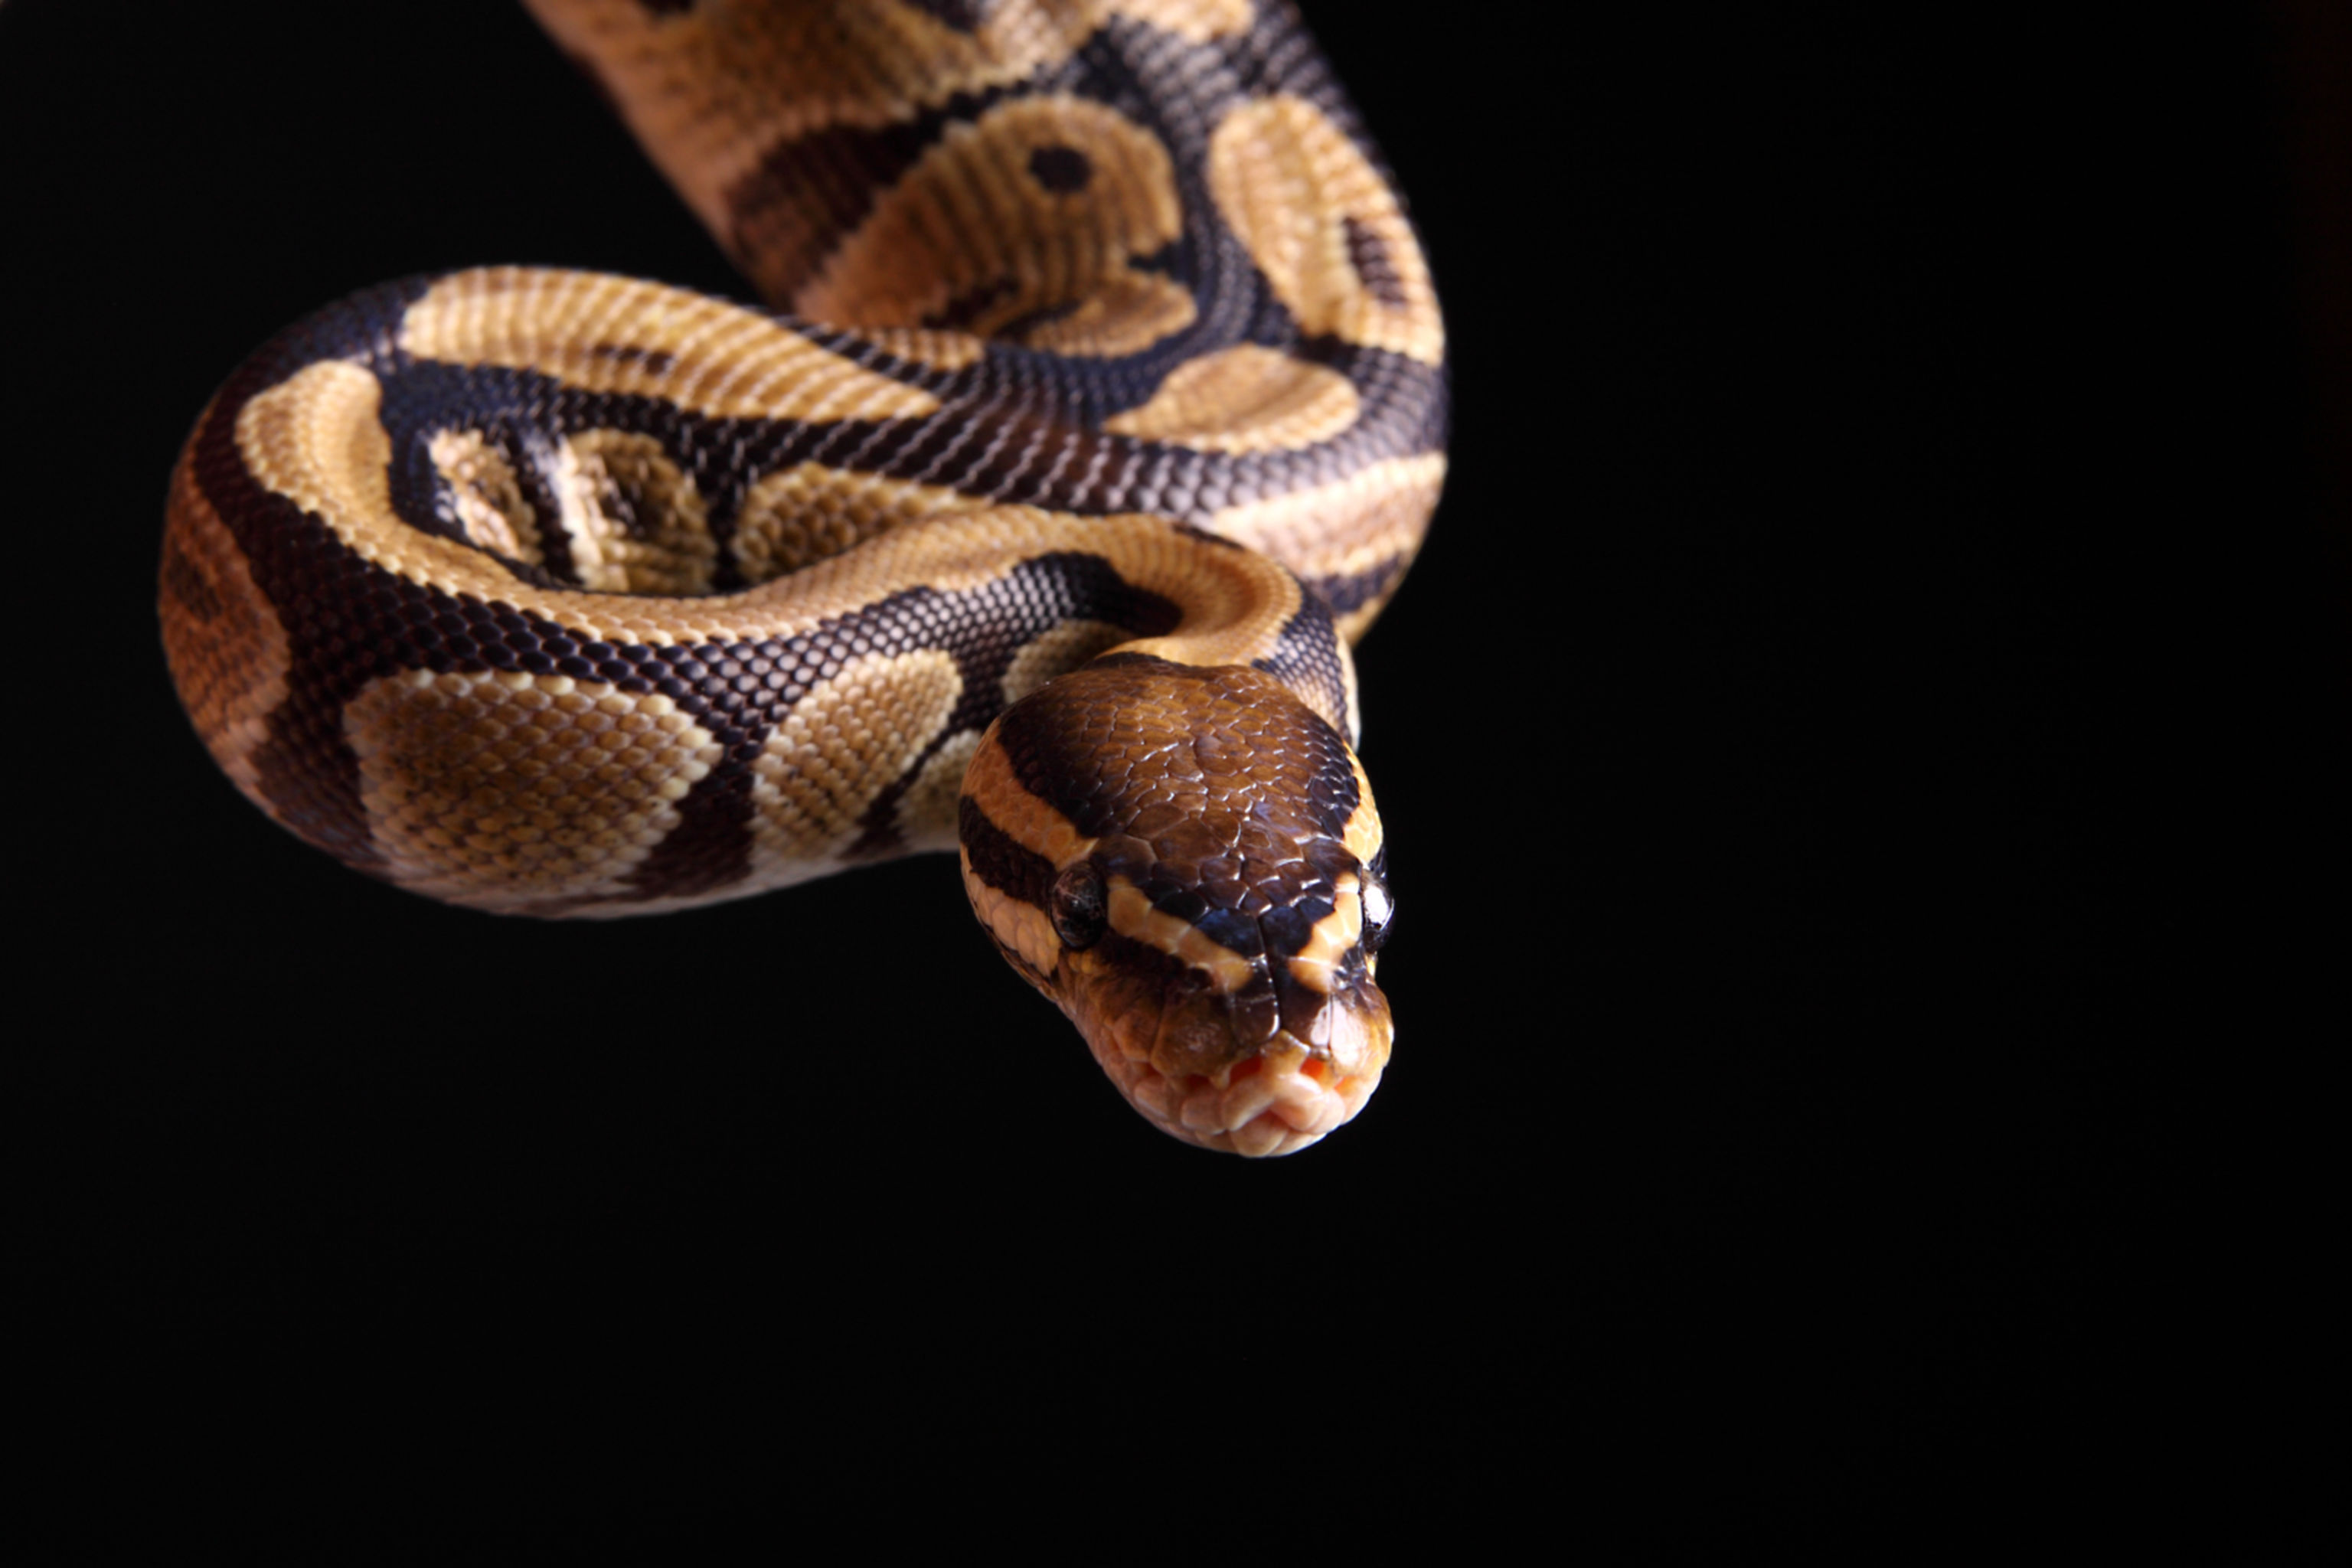

In [33]:
large_image = resize_image(img, 2)
large_image

original image size 1536 x 1024
New image size 307 x 204


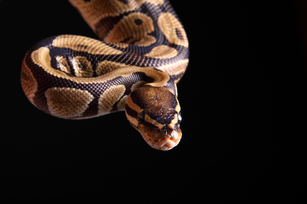

In [35]:
small_image = resize_image(img2, -5)
small_image

In [43]:
def pad_image(image, top=0, left=0, bottom=0, right=0, color=(255, 0, 255)):
    width, height = image.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(image.mode, (new_width, new_height), color)
    result.paste(image, (left, top))
    return result

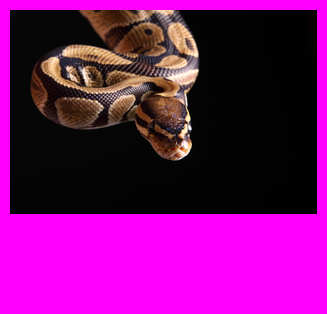

In [44]:
pad_image(small_image, 10, 10, 100, 10)

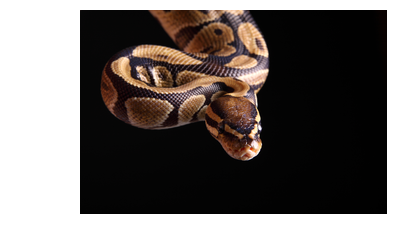

In [130]:
padded_image = pad_image(small_image, 10, 80, 12, 15, (255, 255, 255))
padded_image

In [131]:
pixel_values = np.array(padded_image)

In [133]:

def get_padding(image):
    def cal_padding(pixels, pos):
        width, height, _ = pixels.shape
        padding = 0
        index = width
        if (pos == "top" or pos == "bottom"):
            index = width
        for i in range(width):
            if np.all(pixels[i, :, :] == [255, 255, 255, 255]) and pos == "left":
                padding += 1
            elif np.all(pixels[:, i, :] == [255, 255, 255, 255]) and pos == "top":
                padding += 1
            elif np.all(pixels[-i - 1, :, :] == [255, 255, 255, 255]) and pos == "right":
                padding += 1
            elif np.all(pixels[:, -i - 1, :] == [255, 255, 255, 255]) and pos == "bottom":
                padding += 1
            else:
                break
        return padding
    top= left= bottom= right = 0
    pixels = np.array(image)
    left = cal_padding(pixels, "left")
    top = cal_padding(pixels, "top")
    bottom = cal_padding(pixels, "bottom")
    right = cal_padding(pixels, "right")
    return (top, left, bottom, right)


In [134]:
paddings = get_padding(padded_image)
paddings

(80, 10, 15, 12)